In [1]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')



In [3]:
df = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\breast cancer\breast-cancer.csv")

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##  Data Preprocessing 

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
df['diagnosis'].replace({'M': 0, 'B': 1}, inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Missing Value 

In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# there are no missing values in the dataset

<AxesSubplot:>

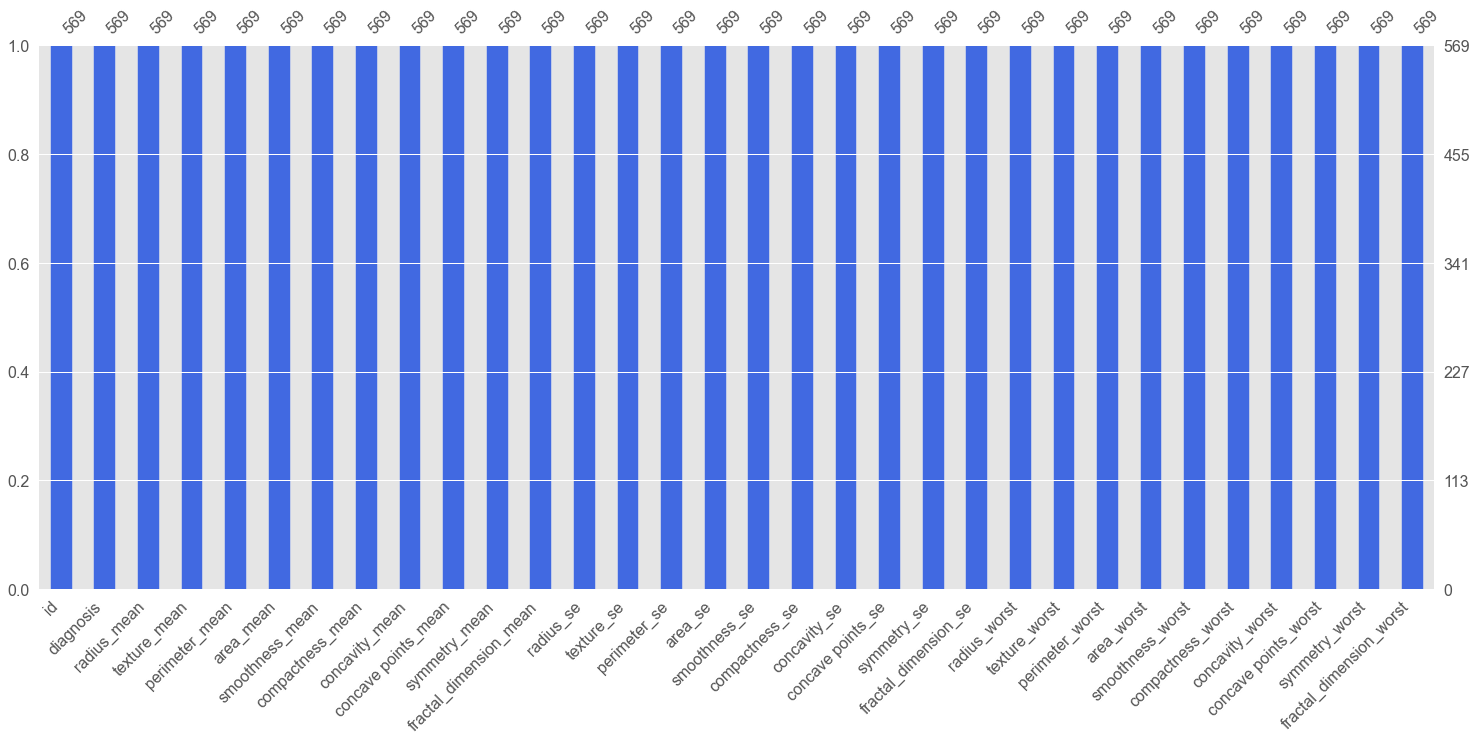

In [12]:
msno.bar(df,color="royalblue")

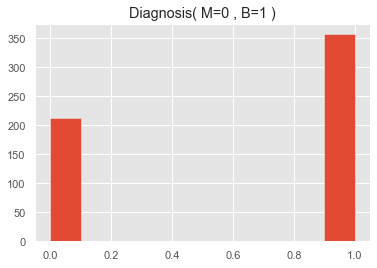

In [13]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis( M=0 , B=1 )')
plt.show()

## EDA 

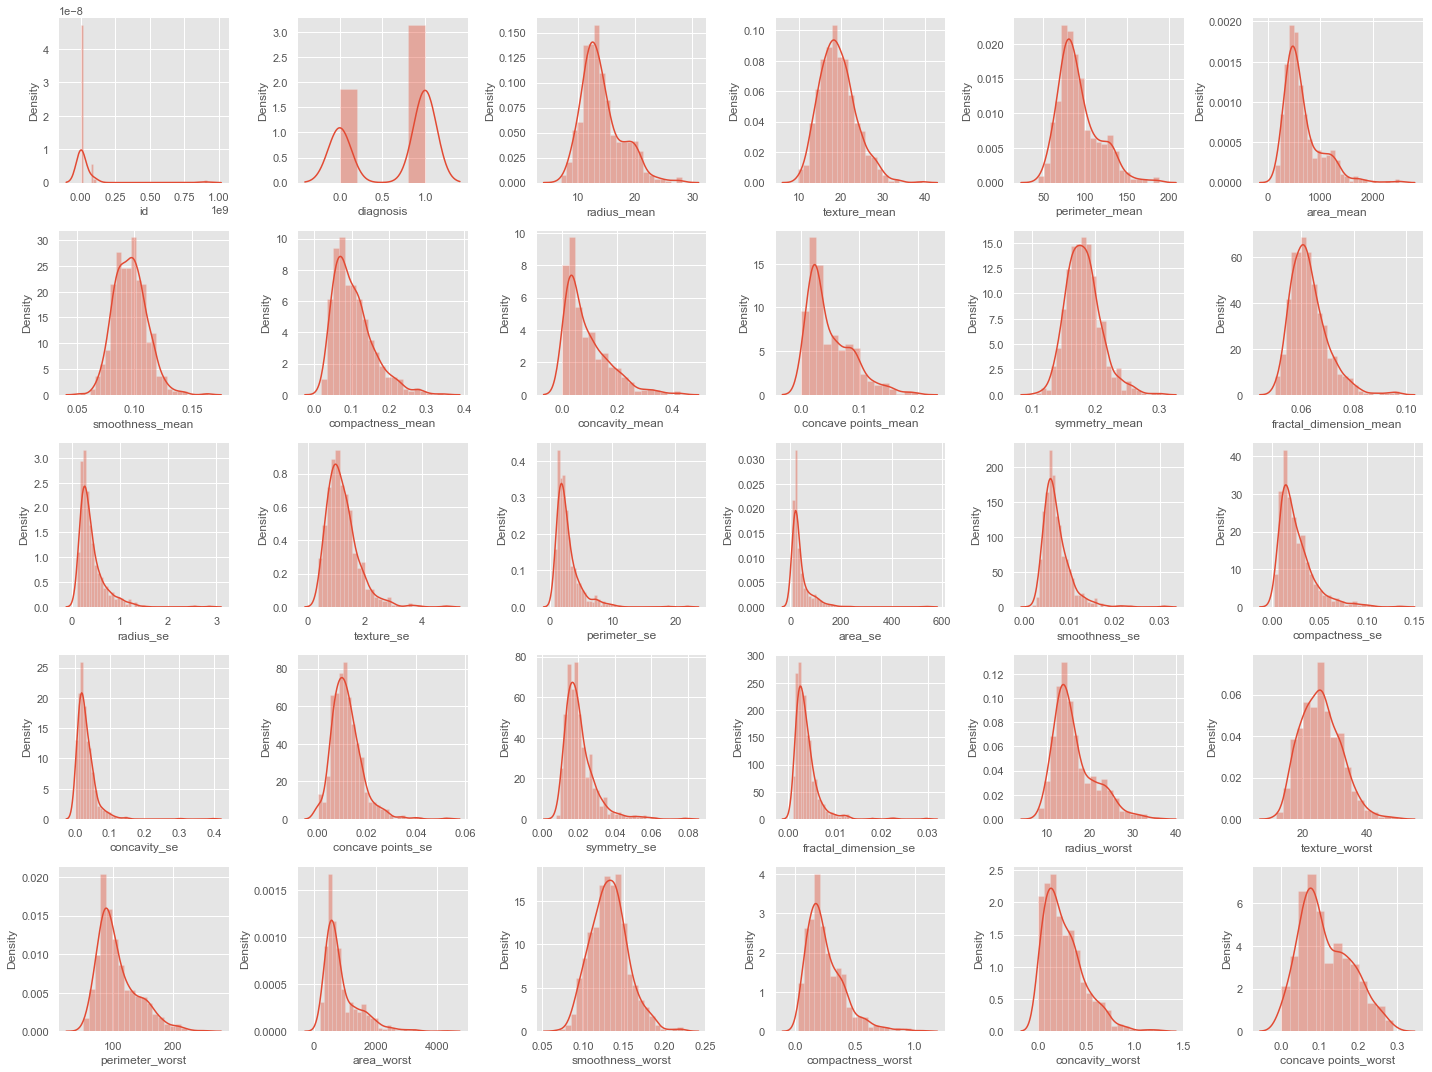

In [14]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax= plt.subplot(5,6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [15]:
#correlation
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,-0.039769,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,0.074626,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


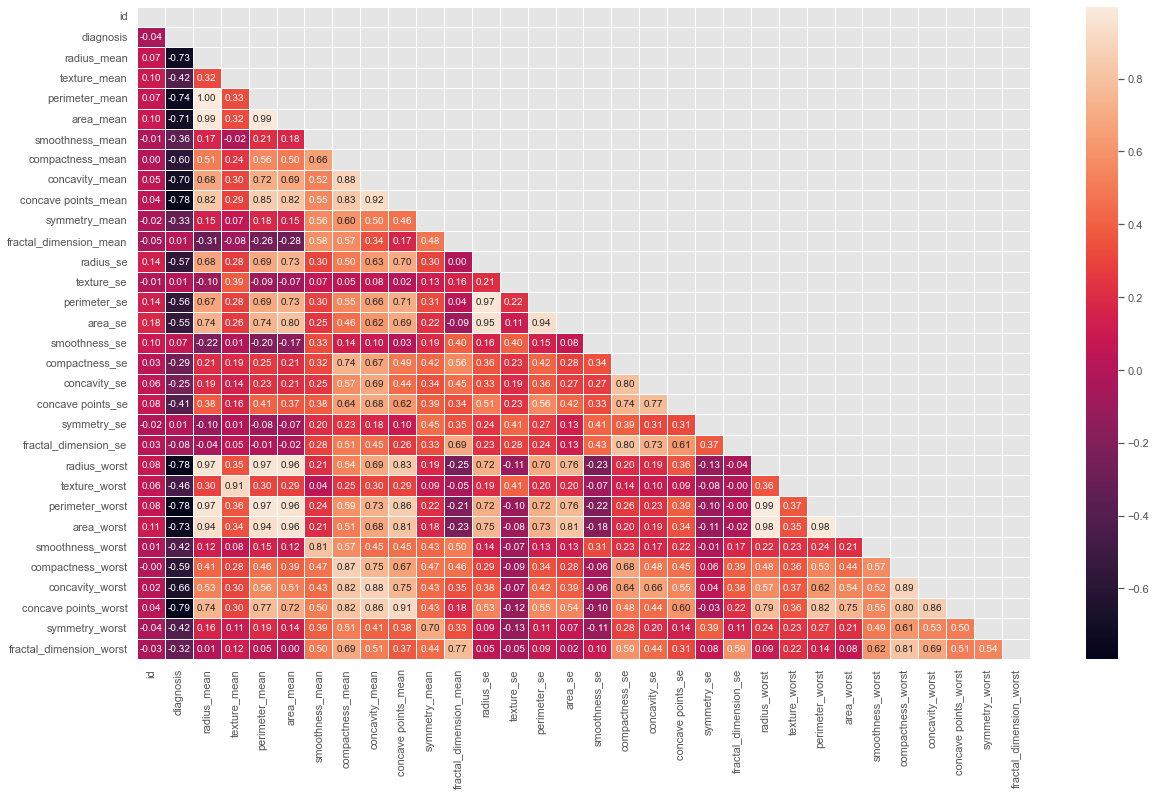

In [16]:
#heatmap
plt.figure(figsize=(20,12))
corr= df.corr()
mask= np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True,fmt='.2f')

plt.show()

In [17]:
df.drop('id',axis=1,inplace=True)

In [18]:
#Feature selection
corr_matrix= df.corr().abs()
mask= np.triu(np.ones_like(corr_matrix,dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop=[x for x in tri_df.columns if any(tri_df[x]>0.92)]

df=df.drop(to_drop, axis=1)
print(df.shape)


(569, 23)


In [19]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Buliding Model

In [20]:
x=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [23]:
x_train.shape

(455, 22)

# Apply Machine Learning algo.

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred = log_reg.predict(x_test)

In [26]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,log_reg.predict(x_train)))

log_reg_acc= accuracy_score(y_test, log_reg.predict(x_test))
print(log_reg_acc)

y_pred= log_reg.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.989010989010989
0.9649122807017544
[[44  3]
 [ 1 66]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## K Neighbors Classifier (KNN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred= knn.predict(x_test)

In [30]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train,knn.predict(x_train)))

knn_acc= accuracy_score(y_test, knn.predict(x_test))
print(knn_acc)

y_pred= knn.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.967032967032967
0.956140350877193
[[43  4]
 [ 1 66]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        47
           1       0.94      0.99      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Support Vector Classifier (SVC) 

In [32]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

svc=SVC()
parameters={
    'gamma': [0.0001,0.001,0.01,0.1],
    'C':[0.01,0.05,0.5,0.1,1,10,15,20]
}
grid_search=GridSearchCV(svc,parameters)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [33]:
# best parameters
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [34]:

#best accuracy
grid_search.best_score_

0.9802197802197803

In [35]:
svc=SVC(C=10,gamma =0.01)
svc.fit(x_train,y_train)

SVC(C=10, gamma=0.01)

In [36]:
#model prediction
y_pred = svc.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy score
print(accuracy_score(y_train,svc.predict(x_train)))

svc_acc= accuracy_score(y_test, svc.predict(x_test))
print(svc_acc)

#confusion matrix
y_pred= svc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.989010989010989
0.9824561403508771
[[45  2]
 [ 0 67]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Decision Tree 

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc= DecisionTreeClassifier()

parameters={
    'criterion':['gini','entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt= GridSearchCV(dtc,parameters, cv=5,n_jobs=1,verbose=1)
grid_search_dt.fit(x_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [39]:
# best parameters
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 28,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'}

In [40]:
#best accuracy
grid_search_dt.best_score_

0.9626373626373628

In [41]:
dtc= DecisionTreeClassifier(criterion='entropy', max_depth=15 ,min_samples_leaf=4 ,min_samples_split= 5, splitter='random')

In [42]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,dtc.predict(x_train)))

dtc_acc= accuracy_score(y_test, dtc.predict(x_test))
print(dtc_acc)

#confusion matrix
y_pred= dtc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9648351648351648
0.9385964912280702
[[46  1]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        47
           1       0.98      0.91      0.95        67

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



## Random Forest Classifier 

In [44]:
from sklearn.ensemble import RandomForestClassifier

rand_clf=RandomForestClassifier(criterion='entropy', max_depth=11,max_features='auto' ,min_samples_leaf= 2,min_samples_split= 3, n_estimators=130)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [45]:
y_pred=rand_clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,rand_clf.predict(x_train)))

rand_clf_acc= accuracy_score(y_test, rand_clf.predict(x_test))
print(rand_clf_acc)

#confusion matrix
y_pred= rand_clf.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9956043956043956
0.9736842105263158
[[44  3]
 [ 0 67]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       0.96      1.00      0.98        67

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## SGD Classifier

In [47]:
from sklearn.linear_model import SGDClassifier

sgd= SGDClassifier()

parameters={
    'alpha':[0.0001,0.001,0.01,0.1,1],
    'loss': ['hinge','log'],
    'penalty':['l1','l2 ']
}

grid_search= GridSearchCV(sgd,parameters, cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2 ']})

In [48]:
# best parameters
grid_search.best_params_

{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}

In [49]:
#best accuracy
grid_search.best_score_

0.9671014492753625

In [50]:
sgd= SGDClassifier(alpha =0.001, loss='log',penalty='l2')
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.001, loss='log')

In [51]:
y_pred= sgd.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,sgd.predict(x_train)))

sgd_acc= accuracy_score(y_test, sgd.predict(x_test))
print(sgd_acc)

#confusion matrix
y_pred= sgd.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.989010989010989
0.9649122807017544
[[45  2]
 [ 2 65]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## Voting Classifier 

In [53]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Logistic Regression', log_reg),('K Nearest Neighbours', knn),('Support Vector Classifier', svc),('Decision Tree',dtc),('random Forest Classifier',rand_clf)]

vc= VotingClassifier(estimators=classifiers)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('K Nearest Neighbours', KNeighborsClassifier()),
                             ('Support Vector Classifier',
                              SVC(C=10, gamma=0.01)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     min_samples_leaf=4,
                                                     min_samples_split=5,
                                                     splitter='random')),
                             ('random Forest Classifier',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=11,
                                                     min_samples_leaf=2,
                                                   

In [54]:
y_pred= vc.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,vc.predict(x_train)))

vc_acc= accuracy_score(y_test, vc.predict(x_test))
print(vc_acc)

#confusion matrix
y_pred= vc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9912087912087912
0.9736842105263158
[[44  3]
 [ 0 67]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       0.96      1.00      0.98        67

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Gradient Boosting Classifier 

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gbc= GradientBoostingClassifier()

parameters={
    'loss':['deviance','exponential'],
    'learning_rate': [0.001,0.1,1,10],
    'n_estimators':[100,150,180,200]
}

grid_search_gbc= GridSearchCV(gbc,parameters, cv=5,n_jobs=-1, verbose=1)
grid_search_gbc.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [57]:
# best parameters
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 150}

In [58]:
#best accuracy
grid_search_gbc.best_score_

0.9736263736263737

In [59]:
gbc= GradientBoostingClassifier(learning_rate= 1, loss= 'exponential', n_estimators= 200)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=200)

In [60]:
y_pred= gbc.predict(x_test)

In [61]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,gbc.predict(x_train)))

gbc_acc= accuracy_score(y_test, gbc.predict(x_test))
print(gbc_acc)

#confusion matrix
y_pred= gbc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
0.9824561403508771
[[46  1]
 [ 1 66]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Stochastic Gradient Boosting(SGB) 

In [63]:
sgbc = GradientBoostingClassifier( max_depth=4, subsample=0.9,max_features=0.75 , n_estimators=200, random_state=0)
sgbc.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           random_state=0, subsample=0.9)

In [64]:
y_pred= sgbc.predict(x_test)

In [65]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,sgbc.predict(x_train)))

sgbc_acc= accuracy_score(y_test, sgbc.predict(x_test))
print(sgbc_acc)

#confusion matrix
y_pred= sgbc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
0.9824561403508771
[[47  0]
 [ 2 65]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.97      0.98        67

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [67]:
models= pd.DataFrame({
    'Model':['Logistic Regresion','KNN','SVC','Decision Tree Classifer','Random Forest Classifier','SGD Classifier','Voting Classifier',' Gradient Boosting Classifier ','Stochastic Gradient Boosting Classifier '],
    'Score': [log_reg_acc, knn_acc,svc_acc , dtc_acc, rand_clf_acc,sgd_acc,vc_acc,gbc_acc,sgbc_acc]
})

models.sort_values(by= "Score", ascending=False)

,Model,Score
2,SVC,0.982456
7,Gradient Boosting Classifier,0.982456
8,Stochastic Gradient Boosting Classifier,0.982456
4,Random Forest Classifier,0.973684
6,Voting Classifier,0.973684
0,Logistic Regresion,0.964912
5,SGD Classifier,0.964912
1,KNN,0.956140
3,Decision Tree Classifer,0.938596


### Best model for Diagnosing breast cancer is "SVC" and "Gradient Boosting Classifier" both with same accuracy of 98.2%

In [68]:
#saving the train model
import pickle

In [69]:

pickle.dump(svc, open('breast_cancer.pkl','wb'))

In [70]:
# Loading model to compare the results
#model = pickle.load(open('model.pkl','rb'))
